In [1]:
#dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#read in train csv
#train_df = pd.read_csv("data/train.csv")
titanic_df = pd.read_csv("data/train.csv")
#test_df = pd.read_csv("data/test_1.csv")
#titanic_df = pd.concat([train_df,test_df], ignore_index = True)
titanic_df['title'] = titanic_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df = pd.get_dummies(titanic_df, columns=['Sex','Embarked','title'])
titanic_df = titanic_df.drop(columns=[
    'Name',
    #'Fare',
    'Ticket',
    'Cabin',
    'Age',
    'title_Major',
    'title_Rev',
    'title_Col',
    'title_Dr',
    'title_Jonkheer',
    'title_Ms',
    'title_Mme',
    'title_Mlle',
    'title_Lady',
    #'title_Dona',
    'title_the Countess',
    'title_Sir',
    'title_Don',
    'title_Capt'
])
#titanic_df = titanic_df.drop(columns=['Sex_female'])
titanic_df['Fare'] = titanic_df['Fare'].round(2)
titanic_df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,1,0,3,1,0,7.25,0,1,0,0,1,0,0,1,0
1,2,1,1,1,0,71.28,1,0,1,0,0,0,0,0,1
2,3,1,3,0,0,7.92,1,0,0,0,1,0,1,0,0
3,4,1,1,1,0,53.10,1,0,0,0,1,0,0,0,1
4,5,0,3,0,0,8.05,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.00,0,1,0,0,1,0,0,0,0
887,888,1,1,0,0,30.00,1,0,0,0,1,0,1,0,0
888,889,0,3,1,2,23.45,1,0,0,0,1,0,1,0,0
889,890,1,1,0,0,30.00,0,1,1,0,0,0,0,1,0


In [4]:
# RF ML Testing

# targets
target = titanic_df["Survived"]
target_names = ["survived", "died"]

#data
data = titanic_df
data = data.drop(columns=['Survived'])
data = data.drop(columns=['PassengerId'])
#data = data.drop(columns=['Sex_male'])

feature_names = data.columns

data.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,3,1,0,7.25,0,1,0,0,1,0,0,1,0
1,1,1,0,71.28,1,0,1,0,0,0,0,0,1
2,3,0,0,7.92,1,0,0,0,1,0,1,0,0
3,1,1,0,53.10,1,0,0,0,1,0,0,0,1
4,3,0,0,8.05,0,1,0,0,1,0,0,1,0


In [133]:
#split data into test and train
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, train_size = .58)



In [5]:
from sklearn.preprocessing import MinMaxScaler
# XScaler = MinMaxScaler().fit(X_train)
# X_trainScaled = XScaler.transform(X_train)
# X_testScaled = XScaler.transform(X_test)
XScaler = MinMaxScaler().fit(data)
X_trainScaled = XScaler.transform(data)

In [6]:
# random forest set up
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)
rf

RandomForestClassifier(n_estimators=50)

In [7]:
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)
#rf = rf.fit(X_trainScaled, y_train)
rf = rf.fit(X_trainScaled, target)
#rf.score(X_testScaled, y_test)

In [8]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, data), reverse=True)

[(0.3311757404170417, 'Fare'),
 (0.14763264843832363, 'Sex_male'),
 (0.10110824845743026, 'Pclass'),
 (0.09685194556906268, 'title_Mr'),
 (0.09199239473345269, 'Sex_female'),
 (0.06993066141408835, 'SibSp'),
 (0.04947941500740166, 'Parch'),
 (0.02570261647235003, 'title_Miss'),
 (0.024409740029790863, 'title_Master'),
 (0.022094232901064517, 'title_Mrs'),
 (0.015520176372405298, 'Embarked_S'),
 (0.012490860515855963, 'Embarked_C'),
 (0.01161131967173219, 'Embarked_Q')]

In [18]:
test_df = pd.read_csv("data/test.csv")
predict_df = test_df.copy()
predict_df['title'] = predict_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#predict_df['Fare'] = predict_df['Fare'].astype('int64')
predict_df = predict_df.dropna(subset = ['Fare'])
#predict_df.fillna(0, inplace=True)
predict_df = pd.get_dummies(predict_df, columns=['Sex','Embarked','title'])
predict_df = predict_df.drop(columns=[
    'Name',
    'Ticket',
    'Cabin',
    #'Fare',
    'Age',
    'PassengerId',
    #'title_Major',
    'title_Rev',
    'title_Col',
    'title_Dr',
    #'title_Jonkheer',
    'title_Ms',
    #'title_Mme',
    #'title_Mlle',
    #'title_Lady',
    'title_Dona',
    #'title_the Countess',
    #'title_Sir',
    #'title_Don',
    #'title_Capt'
])

#predict_df.to_csv('find_nan.csv', index = True)
predict_df

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,3,0,0,7.8292,0,1,0,1,0,0,0,1,0
1,3,1,0,7.0000,1,0,0,0,1,0,0,0,1
2,2,0,0,9.6875,0,1,0,1,0,0,0,1,0
3,3,0,0,8.6625,0,1,0,0,1,0,0,1,0
4,3,1,1,12.2875,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,1,0,0,1,0,0,1,0
414,1,0,0,108.9000,1,0,1,0,0,0,0,0,0
415,3,0,0,7.2500,0,1,0,0,1,0,0,1,0
416,3,0,0,8.0500,0,1,0,0,1,0,0,1,0


In [10]:
rf.predict(predict_df)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [29]:
ans = pd.read_csv('./Sample Submission/gender_submission.csv')
names_df = test_df[['PassengerId','Name','Fare']].copy()
answers = ans.merge(names_df, on='PassengerId')
answers = answers.dropna(subset = ['Fare']).drop(columns = ['Fare'])
answers

,PassengerId,Survived,Name
0,892,0,"Kelly, Mr. James"
1,893,1,"Wilkes, Mrs. James (Ellen Needs)"
2,894,0,"Myles, Mr. Thomas Francis"
3,895,0,"Wirz, Mr. Albert"
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
...,...,...,...
413,1305,0,"Spector, Mr. Woolf"
414,1306,1,"Oliva y Ocana, Dona. Fermina"
415,1307,0,"Saether, Mr. Simon Sivertsen"
416,1308,0,"Ware, Mr. Frederick"


In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier
#classifier.fit(X_train, y_train)
classifier.fit(data, target)

predictions = classifier.predict(predict_df)
#predictions = classifier.predict(X_test)
df = pd.DataFrame({
    'PassengerId':answers['PassengerId'],
    'Name': answers['Name'],
    'Prediction': predictions, 
    'Actual': answers['Survived']
}).reset_index(drop=True)
df.to_csv('predict_df.csv', index = False)

df

C:\Users\e_mcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,PassengerId,Name,Prediction,Actual
0,892,"Kelly, Mr. James",0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,1
2,894,"Myles, Mr. Thomas Francis",0,0
3,895,"Wirz, Mr. Albert",0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1
...,...,...,...,...
412,1305,"Spector, Mr. Woolf",0,0
413,1306,"Oliva y Ocana, Dona. Fermina",1,1
414,1307,"Saether, Mr. Simon Sivertsen",0,0
415,1308,"Ware, Mr. Frederick",0,0


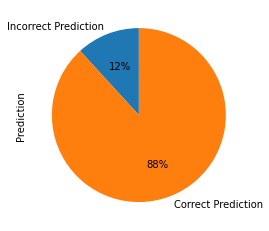

In [32]:
labels = ['Incorrect Prediction', 'Correct Prediction']
plot = df.groupby(['Actual']).sum().plot(kind = 'pie', y='Prediction', startangle=90, autopct='%1.0f%%', labels = labels, legend=None)

In [149]:
classifier.fit(X_train, y_train)
print('Testing data score: ', classifier.score(X_test, y_test))

Testing data score:  0.86


C:\Users\e_mcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
# LR ML Testing

In [103]:
#train test split here  --look up docs on data split
#after split, which model to use  --random forest (supervised machine learning)
#deep learning another option




In [119]:
from sklearn.linear_model import LinearRegression
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### END SOLUTION

In [120]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [121]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5092579556644032
Testing Score: 0.5145233975351107


Text(0.5, 1.0, 'Residual Plot')

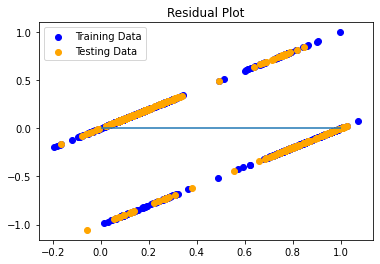

In [122]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [45]:
# #data cleaning

# #round ticket to 2 places
# titanic_data['Fare'] = titanic_data['Fare'].round(2)

# #adding numerical sex column so ML algorithm can recognize it
# titanic_data["Sex_Num"] = ""

# #adding numberical location column so ML algorithm can recognize it
# titanic_data["Location_Num"] = ""

# #drop lines for ticket id
# titanic_data = titanic_data.drop(titanic_data[titanic_data["Fare"] == 0].index)
    
# #turning Sex column into 0 = male and 1 = female
# titanic_data["Sex"] = titanic_data["Sex"].replace(["male"], 0)
# titanic_data["Sex"] = titanic_data["Sex"].replace(["female"], 1)

# #strip out titles (looking for non ms. mrs. or mr. titles)

# #display new DF
# titanic_data